In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# visualization style

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [160]:
# LOADING DATASET

df = pd.read_csv(r"D:\data_analytics\projects\social media success\Cleaned_Viral_Social_Media_Trends.csv")
print("Data Loaded successfully!")

Data Loaded successfully!


In [161]:
# DATA OVERVIEW

print("="*60)
print("DATA OVERVIEW")
print("="*60)

print(f"Shape: {df.shape[0]:,} rows and {df.shape[1]} columns")

print(f"\nColumns:")
df.columns.tolist()

DATA OVERVIEW
Shape: 5,000 rows and 11 columns

Columns:


['Post_ID',
 'Post_Date',
 'Platform',
 'Hashtag',
 'Content_Type',
 'Region',
 'Views',
 'Likes',
 'Shares',
 'Comments',
 'Engagement_Level']

In [162]:
print(f"\nFirst 5 rows")
df.head()


First 5 rows


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [163]:
def quality_check(df):
    quality_repost = pd.DataFrame({
        "Data Type": df.dtypes,
        "Null values": df.isnull().sum(),
        "Null-missing %": (df.isnull().sum()/len(df))*100,
        "Unique Values": df.nunique(),
        "Sample values": [df[col].dropna().unique()[:3] for col in df.columns]
        })
    return quality_repost

print("="*60)
print("DATA QUALITY CHECK")
print("="*60)

reviewd_data = quality_check(df)
display(reviewd_data)

DATA QUALITY CHECK


,Data Type,Null values,Null-missing %,Unique Values,Sample values
Post_ID,object,0,0.0,5000,"[Post_1, Post_2, Post_3]"
Post_Date,object,0,0.0,729,"[2022-01-13, 2022-05-13, 2022-01-07]"
Platform,object,0,0.0,4,"[TikTok, Instagram, Twitter]"
Hashtag,object,0,0.0,10,"[#Challenge, #Education, #Dance]"
Content_Type,object,0,0.0,6,"[Video, Shorts, Post]"
Region,object,0,0.0,8,"[UK, India, Brazil]"
Views,int64,0,0.0,4996,"[4163464, 4155940, 3666211]"
Likes,int64,0,0.0,4972,"[339431, 215240, 327143]"
Shares,int64,0,0.0,4877,"[53135, 65860, 39423]"
Comments,int64,0,0.0,4735,"[19346, 27239, 36223]"


In [164]:
# BASIC STATISTICS

print("="*60)
print("BASIC STATISTICS")
print("="*60)

print("\nNumerical Columns:")
summary = df.describe().round(0).astype(int)
summary = summary.map(lambda x: f"{x:,}")
print(f"\n{summary}")

print("\nCategorical Columns:")
categorical_cols = ['Platform','Hashtag','Content_Type','Region','Engagement_Level']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts().sort_values(ascending = False))


BASIC STATISTICS

Numerical Columns:

           Views    Likes  Shares Comments
count      5,000    5,000   5,000    5,000
mean   2,494,066  251,475  50,520   24,888
std    1,459,490  144,350  29,066   14,285
min        1,266      490      52       18
25%    1,186,207  126,892  25,029   12,305
50%    2,497,373  249,443  50,840   25,004
75%    3,759,781  373,971  75,774   37,073
max    4,999,430  499,922  99,978   49,993

Categorical Columns:

Platform:
Unique values: 4
Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

Hashtag:
Unique values: 10
Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64

Content_Type:
Unique values: 6
Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtyp

In [165]:
# DATA CLEANING

print("="*60)
print("DATA CLEANING")
print("="*60)

# Check the duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} rows")
else:
    print(f"\nDuplicate rows: {duplicates}")

# handling missing values if any
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    numerical_cols = ['Views', 'Likes', 'Shares', 'Comments']
    for col in numerical_cols:
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace= True)
            print(f"Filled missing values in {col} with median: {median_val}")
else:
    print(f"\nNull Values in numerical columns: {missing_values}")

# fill the categorical columns with mode
for col in categorical_cols:
    if col in df.columns and df[col].isnull().any():
        mode_val = df[col].mode()
        df[col].fillna(mode_val, inplace = True)
        print (f"\nFilled missing values in {col} with mode: {mode_val}")
else:
    print(f"\nNull Values in categorical columns: {missing_values}")

# The dataset does not have any null values as well as no duplicates as well. 
# i did the analysis to show that we can find the null and duplicate nad fill them efficiently like this.

DATA CLEANING

Duplicate rows: 0

Null Values in numerical columns: 0

Null Values in categorical columns: 0


In [166]:
df.columns = df.columns.str.lower()

In [ ]:
# Convert post_date to datetime

if "post_date" in df.columns:
    df["post_date"] = pd.to_datetime(df["post_date"])
    df["year"] = df["post_date"].dt.year
    df["month"] = df["post_date"].dt.month
    df["day"] = df["post_date"].dt.day
    df["day_of_week"] = df["post_date"].dt.day_name()
    df["weekday_weekend"] = df["day_of_week"].apply(lambda x: "weekend" if x in ["Saturday", "Sunday"] else "weekday")

print(f"Date range: {df["post_date"].dt.date.min()} to {df["post_date"].dt.date.max()}")

# CALCULATE ENGAGEMENT RATE
df["engagement_rate"] = (df["likes"] + df["shares"] + df["comments"])/ df["views"]*100

df[["year","month","day","day_of_week","weekday_weekend"]].sample(5,random_state = 32)

Date range: 2022-01-01 to 2023-12-30


,year,month,day,day_of_week,weekday_weekend
3279,2022,12,31,Saturday,weekend
1823,2022,8,1,Monday,weekday
287,2023,7,1,Saturday,weekend
531,2022,8,14,Sunday,weekend
3480,2022,10,6,Thursday,weekday


In [168]:
# PLATFORM ANALYSIS
print("\n" + "="*60)
print("PLATFORM ANALYSIS")
print("="*60)

platform_stats = df.groupby("platform").agg({
    "views" : ["mean", "median", "max"],
    "likes" : ["mean", "median", "max"],
    "shares" : ["mean", "median", "max"],
    "comments" : ["mean", "median", "max"],
    "engagement_rate" : "mean",
    "post_id": "count"
})

platform_stats.columns = ['_'.join(col).strip() for col in platform_stats.columns]
pf_analysis_summary = platform_stats.round(2).astype(int)
pf_analysis_summary = pf_analysis_summary.map(lambda x: f"{x:,}")
print(pf_analysis_summary)


# I analyzed how content perform in 4 major platforms by comparing key metrics. for each platform 
# i calculate the average (what you can expect on a good day), median the typical performance(what happens
# most of the time) and max potential.

# What's possible? (Max): Sets aspirational goals
# What's realistic? (Median): Sets baseline expectations
# What's the average? (Mean): Shows overall performance"

# Now as per the output:

# Any platform has the potential to produce viral content. since the maximum liek and views are almost the same.
# Instagram created the highest audience engagement Twitter is more about brodcasting

# Likes (Affinity): YouTube (258K) > Instagram (257K) > Twitter (246K) > TikTok (244K)
# Shares (Virality): TikTok (51.5K) > Instagram (50.3K) > Twitter (50.2K) > YouTube (50.1K)
# Comments (Conversation): YouTube (25.3K) > Instagram (25.0K) > TikTok (24.8K) > Twitter (24.5K)

# The Executive Summary:
# "Our analysis of 5,000 viral posts reveals that while all platforms offer similar viral potential, they serve different strategic purposes. 
# Instagram delivers the highest engagement rates (66%), YouTube offers the most consistent performance, and TikTok excels at shareability. 
# Twitter, while having lower engagement, shouldn't be ignored as it offers unique reach."

# Platform-Specific Recommendations:
# For Instagram:
# "Focus here for maximum audience connection. The 66% engagement rate means audiences are deeply interacting with content."

# For YouTube:
# "Use for reliable, consistent results. The close match between mean and median suggests predictable outcomes."

# For TikTok:
# "Invest here for viral potential. Highest share rates indicate content spreads fastest here."

# For Twitter:
# "Use for announcements and news. Lower engagement but important for reach and timely content."



PLATFORM ANALYSIS
          views_mean views_median  views_max likes_mean likes_median  \
platform                                                               
Instagram  2,404,079    2,376,488  4,997,766    257,118      263,706   
TikTok     2,515,015    2,510,894  4,997,284    244,206      238,829   
Twitter    2,506,004    2,492,006  4,997,429    245,880      241,305   
YouTube    2,545,648    2,579,296  4,999,430    258,314      261,988   

          likes_max shares_mean shares_median shares_max comments_mean  \
platform                                                                 
Instagram   499,664      50,310        49,361     99,894        24,958   
TikTok      499,922      51,468        53,235     99,978        24,778   
Twitter     499,309      50,227        49,675     99,953        24,456   
YouTube     499,874      50,073        49,974     99,926        25,321   

          comments_median comments_max engagement_rate_mean post_id_count  
platform                   

Text(0, 0.5, 'Engagement Rate (%)')

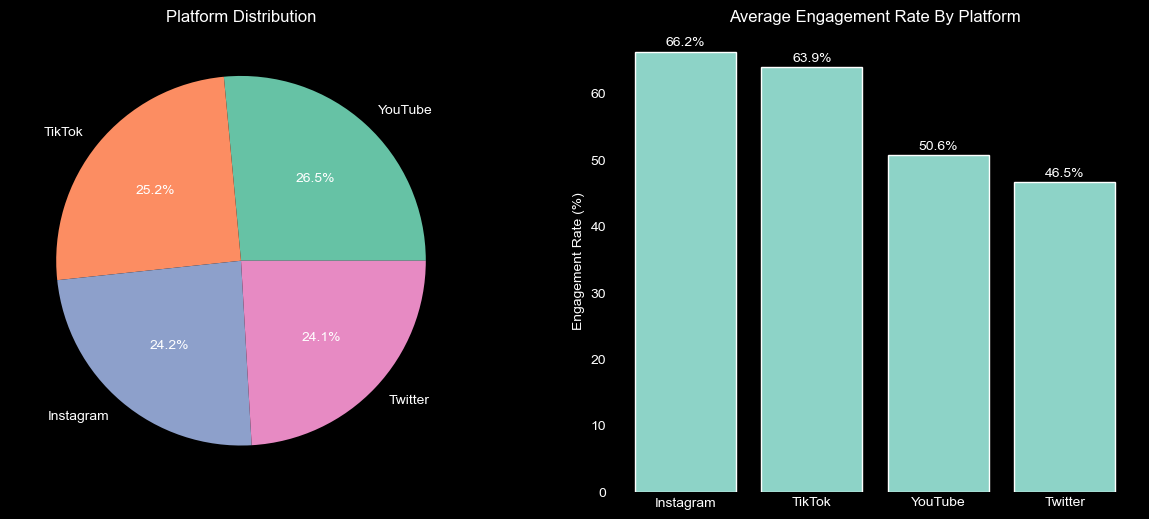

In [169]:
# VISUALIZATION

# Platform distribution
plt.style.use("dark_background")

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
platform_count = df["platform"].value_counts()
colors = plt.cm.Set2(np.arange(len(platform_count)))
plt.pie(
    platform_count.values,
    labels=platform_count.index,
    autopct='%.1f%%',
    colors = colors,
    textprops = {"color":"white", "fontsize": 10}
)
plt.title('Platform Distribution')

# AVERAGE ENGAGEMENT RATE BY PLATFORMS
plt.subplot(1,2,2)
engagement_by_platform = df.groupby("platform")["engagement_rate"].mean().sort_values(ascending = False)
plt.bar(
    engagement_by_platform.index,
    engagement_by_platform.values,
    edgecolor='white'
)
for i, value in enumerate(engagement_by_platform.values):
    plt.text(i, value + 0.5, # i is x position, value is y height
             f'{value:.1f}%',
             ha='center', va='bottom',
             color='white', fontsize=10)
plt.grid(False)    
plt.title("Average Engagement Rate By Platform")
plt.ylabel("Engagement Rate (%)")



In [170]:
# # 1. Check ALL unique combinations in your data
# print("Current Platform-Content Combinations:")
# print(df[['platform', 'content_type']].drop_duplicates().sort_values(['platform', 'content_type']))

# # 2. Count how many of each impossible combination
# print("\nCount of each combination:")
# print(df.groupby(['platform', 'content_type']).size().sort_values(ascending=False))

# Create the correction dictionary
correction_map = {
    ('Instagram', 'Tweet'): 'Post',
    ('Instagram', 'Shorts'): 'Reel',
    ('TikTok', 'Post'): 'Shorts',
    ('TikTok', 'Reel'): 'Shorts',
    ('TikTok', 'Tweet'): 'Shorts',
    ('Twitter', 'Post'): 'Tweet',
    ('Twitter', 'Reel'): 'Video',
    ('Twitter', 'Shorts'): 'Video',
    ('YouTube', 'Post'): 'Video',
    ('YouTube', 'Reel'): 'Shorts',
    ('YouTube', 'Tweet'): 'Video'
}

# Apply in ONE line using tuple lookup
df['content_type_corrected'] = df.apply(
    lambda row: correction_map.get((row['platform'], row['content_type']), row['content_type']),
    axis=1
)

# Check results
df[['platform', 'content_type', 'content_type_corrected']].head(10)

,platform,content_type,content_type_corrected
0,TikTok,Video,Video
1,Instagram,Shorts,Reel
2,Twitter,Video,Video
3,YouTube,Shorts,Shorts
4,TikTok,Post,Shorts
5,Instagram,Shorts,Reel
6,YouTube,Tweet,Video
7,YouTube,Shorts,Shorts
8,Twitter,Live Stream,Live Stream
9,TikTok,Shorts,Shorts


In [171]:
# pd.crosstab() creates a contingency table - basically a frequency count table showing the relationship between two categorical variables.

# normalize = index, shoews the percent ine value is effecting in a particular metrics

# -----------------------------------------------------
# Cross-Tabulation: platform vs content-type
# -----------------------------------------------------
cross_tab = pd.crosstab(df["platform"], df["content_type_corrected"], normalize="index")*100
print("\nContent Type Distribution by Platform (%):")
cross_tab.round(1)

# Our analysis reveals distinct platform personalities: TikTok demands Shorts (67% engagement), 
# YouTube balances Video and Shorts (50% vs 33%), Instagram offers Reel-Post duality (34% vs 31%), and Twitter prioritizes Video content (47%). 
# Live Streaming delivers consistent 16-17% engagement everywhere.


Content Type Distribution by Platform (%):


content_type_corrected,Live Stream,Post,Reel,Shorts,Tweet,Video
platform,,,,,,
Instagram,17.4,31.3,33.8,0.0,0.0,17.5
TikTok,16.4,0.0,0.0,66.6,0.0,17.0
Twitter,17.1,0.0,0.0,0.0,35.9,47.0
YouTube,17.4,0.0,0.0,32.6,0.0,49.9


Text(127.17708333333333, 0.5, 'Platform')

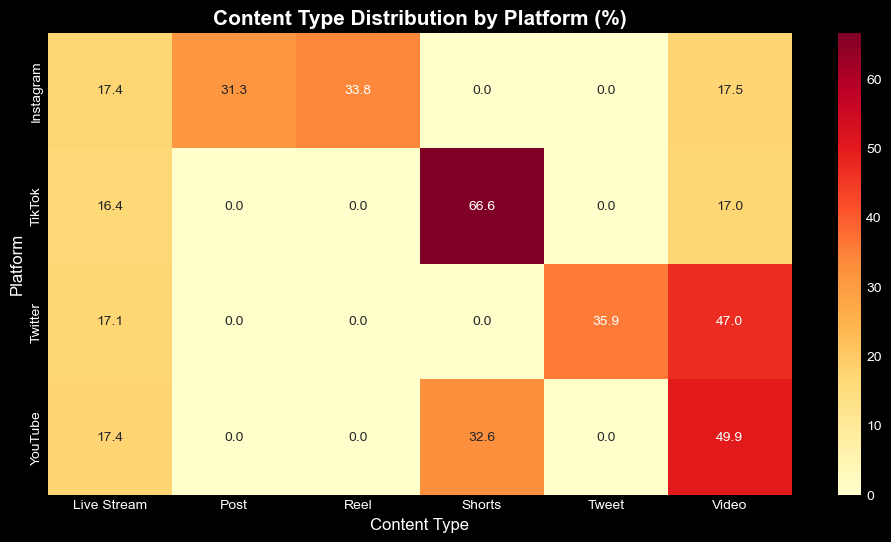

In [172]:
# VISUALIZATION

# Chart 1: Heatmap - content type distribution by platform
plt.figure(figsize = (12,6))
sns.heatmap(cross_tab, annot=True,fmt=".1f",cmap="YlOrRd")
plt.title("Content Type Distribution by Platform (%)", fontsize = 15, fontweight = "bold")
plt.xlabel("Content Type", fontsize = 12)
plt.ylabel("Platform", fontsize = 12)



Content Type Performance
                             views  engagement_rate  post_id_count
content_type_corrected                                            
Reel                    2355011.47            68.42            410
Post                    2511623.45            68.41            379
Live Stream             2481009.01            61.88            855
Shorts                  2563312.78            59.75           1271
Video                   2484010.08            49.24           1653
Tweet                   2471227.61            45.32            432

Top 3 Content Types by Engagement Rate


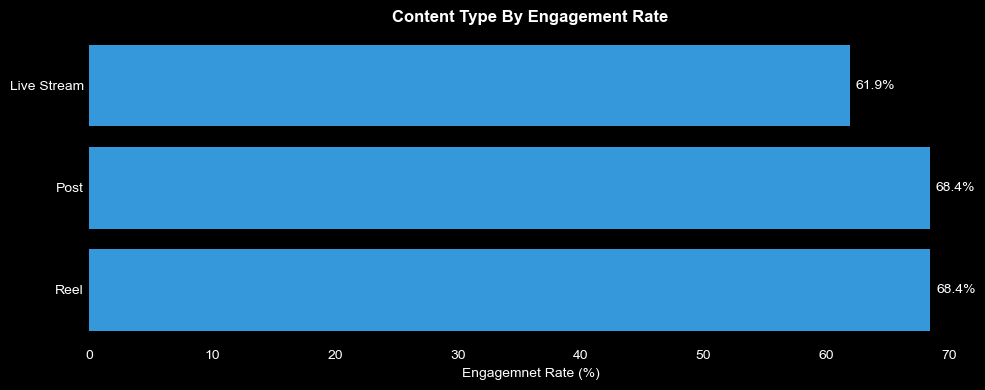

In [173]:
# ENGAGEMNET BY CONTENET TYPE

content_engagement = df.groupby("content_type_corrected").agg({
    "views" : "mean",
    "engagement_rate" : "mean",
    "post_id" : "count"
}).round(2).sort_values("engagement_rate", ascending = False)

content_engagement = content_engagement.rename(columns={"post_id":"post_id_count"})
print("\nContent Type Performance")
print("="*60)
print(content_engagement)


# Chart 2: Top 3 Content Types by Engagement Rate

print("\nTop 3 Content Types by Engagement Rate")
print("="*60)

plt.figure(figsize=(10,4))

top_content = content_engagement.nlargest(3,"engagement_rate")

bar = plt.barh(top_content.index, top_content["engagement_rate"], color='#3498db')
plt.title("Content Type By Engagement Rate", fontsize = 12, fontweight = "bold")
plt.grid(False)
plt.xlabel("Engagemnet Rate (%)", fontsize = 10)

for i , value in enumerate(top_content["engagement_rate"]):
    plt.text(value + 0.5,   
             i,             
             f'{value:.1f}%',
             ha='left',     
             va='center',   
             color='white',
             fontsize=10)

plt.tight_layout()

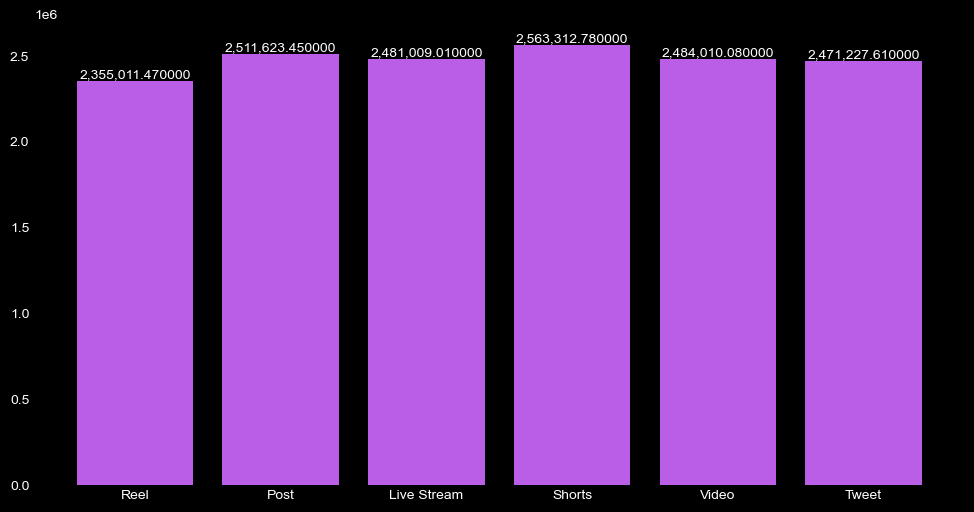

In [174]:
# CHART 3: Views vs Engagement Rate Scatter
plt.figure(figsize=(12, 6))
bar = plt.bar(content_engagement.index,
              content_engagement["views"].values,
              color="#BB5EE7")

for i, value in enumerate(content_engagement["views"].values):
    plt.text(i,
             value + 0.8,
             f"{value:,f}",
             ha = "center",
             va = "bottom",
             color = "white",
             fontsize = 10)
    
plt.grid(False)


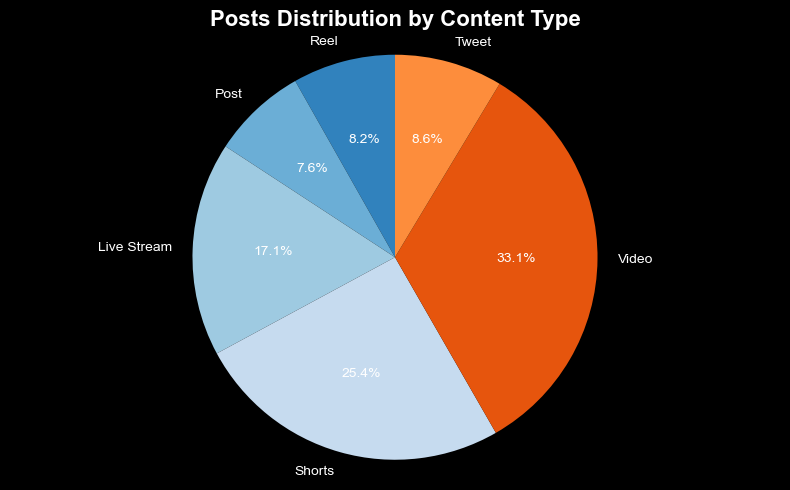

In [175]:
plt.figure(figsize=(8, 5))

# Create pie chart
plt.pie(content_engagement['post_id_count'], 
        labels=content_engagement.index,
        autopct='%.1f%%',
        startangle=90,
        textprops = {"color": "white"},
        colors=plt.cm.tab20c(np.arange(len(content_engagement))))

plt.title('Posts Distribution by Content Type', fontsize=16, fontweight='bold')
plt.axis("equal")
plt.tight_layout()
plt.show()

In [176]:
# HASGTAG ANALYSIS
print("="*60)
print("HASHTAG ANALYSIS")
print("="*60)

print(f"\nTotal number of hashtags: {df["hashtag"].nunique()}")
print("-"*60)

hashtag_counts = df["hashtag"].value_counts().head(5)
print("\nTop 5 Hastags")
print("-"*60)
print(hashtag_counts)

# Hashtag performance
hashtag_performance = df.groupby("hashtag").agg({
    "views": "mean",
    "engagement_rate" : "mean",
    "post_id" : "count"
}).round(2).sort_values('engagement_rate', ascending=False)


top_5_hashtags = hashtag_performance.head(5).sort_values("engagement_rate", ascending = False)
print("\nTope 5 Hashtag by Engagement Rate:")
print("-"*60)
print(top_5_hashtags)

HASHTAG ANALYSIS

Total number of hashtags: 10
------------------------------------------------------------

Top 5 Hastags
------------------------------------------------------------
hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
Name: count, dtype: int64

Tope 5 Hashtag by Engagement Rate:
------------------------------------------------------------
               views  engagement_rate  post_id
hashtag                                       
#Viral    2437590.28           100.47      481
#Comedy   2450141.71            66.96      505
#Gaming   2500698.95            62.07      479
#Fitness  2599391.00            54.41      536
#Tech     2516381.46            53.61      491


In [177]:
hashtag_platform_counts = df[df["hashtag"].isin(top_5_hashtags)].groupby(["hashtag", "platform"]).size().unstack().fillna(0)

hashtag_platform_counts["total"] = hashtag_platform_counts.sum(axis=1)

hashtag_platform_counts["%_of_total"] = (hashtag_platform_counts["total"]/hashtag_platform_counts["total"].sum()*100).round(1)

print("Top 5 Hashtags Distribution")
hashtag_platform_counts.sort_values("%_of_total", ascending=False)

# YouTube: Education, Challenge
# Instagram: Fitness, Dance
# Twitter: Comedy, Education
# TikTok: Everything works

Top 5 Hashtags Distribution


platform,total,%_of_total
hashtag,,


In [178]:
# Regional Analysis
print("\n" + "="*60)
print("REGIONAL ANALYSIS")
print("="*60)

region_stats = df.groupby("region").agg({
    "engagement_rate" : "mean",
    "post_id" : "count"
}).round(2).sort_values("engagement_rate", ascending = False)

region_stats = region_stats.rename(columns={"engagement_rate":"engagement_rate(%)"})

print("Regional Performance:")
region_stats

# Looking at our regional engagement data, we see a clear pattern: USA leads with exceptional 91% engagement, while other major markets maintain 
# a healthy 50-56% average.This means we shoul Amplify what works in USA while adapting the same successful formula to other regions with simple 
# adjustments for time zones and cultural relevance,Same great content, smarter delivery: we will maintain our core messaging but schedule it for local
# peak hours and add regional flavor through local holidays, events, and cultural references.



REGIONAL ANALYSIS
Regional Performance:


,engagement_rate(%),post_id
region,,
USA,91.08,677
Australia,55.56,602
Japan,55.05,592
Canada,54.87,658
UK,53.89,647
Brazil,53.36,641
India,50.05,617
Germany,35.41,566


In [179]:
# Time-Based Analysis
print("\n" + "="*60)
print("TIME-BASED ANALYSIS")
print("="*60)

# day of week analysis

day_stats = df.groupby("day_of_week").agg({
    "engagement_rate" : "mean",
    "post_id" : "count"
}).round(2).sort_values("engagement_rate", ascending = False)

day_stats = day_stats.rename(columns={"engagement_rate":"engagement_rate(%)"})
print("\nPerformance by Day of Week:")
day_stats


TIME-BASED ANALYSIS

Performance by Day of Week:


,engagement_rate(%),post_id
day_of_week,,
Sunday,94.61,722
Tuesday,61.76,702
Friday,57.88,726
Wednesday,55.24,706
Saturday,44.28,693
Monday,42.87,718
Thursday,40.45,733


In [181]:
# Month Analysis

month_stats = df.groupby("month").agg({
    "engagement_rate" : "mean",
    "post_id" : "count"
}).round(2).sort_values("month")

month_stats = month_stats.rename(columns={"engagement_rate":"engagement_rate(%)"})
print("\nPerformance by Month:")
month_stats

# The data reveals September delivers the highest engagement. September can be the most important month for content launches, while other 
# months support with consistent presence and preparation. 


Performance by Month:


,engagement_rate(%),post_id
month,,
1,51.28,386
2,31.30,402
3,48.70,408
4,39.51,395
5,53.53,445
6,67.77,432
7,50.39,416
8,46.90,422
9,116.87,425


In [182]:
# Corelation analysis

print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

numerical_col = ["views", "likes","shares", "comments","engagement_rate"]
correlation_matrix = df[numerical_col].corr()

print("Correlation Matrix:")
correlation_matrix.round(3)




CORRELATION ANALYSIS
Correlation Matrix:


,views,likes,shares,comments,engagement_rate
views,1.000,-0.003,0.013,-0.010,-0.153
likes,-0.003,1.000,0.011,-0.012,0.051
shares,0.013,0.011,1.000,-0.000,-0.001
comments,-0.010,-0.012,-0.000,1.000,0.023
engagement_rate,-0.153,0.051,-0.001,0.023,1.000


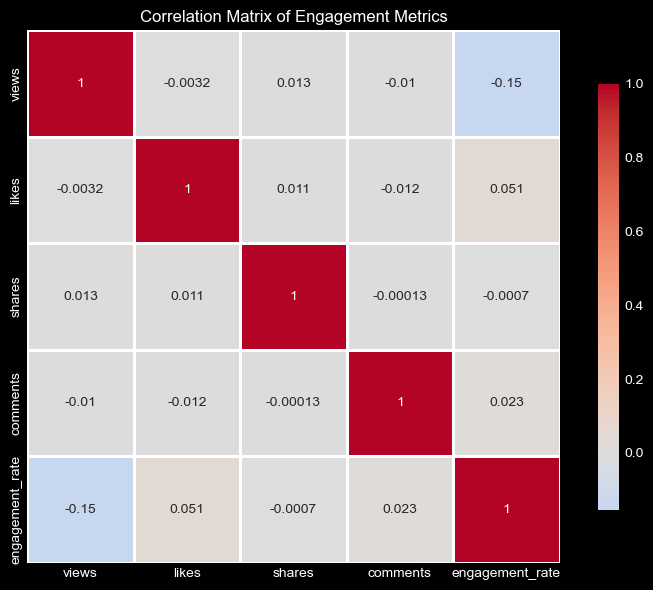

In [183]:
# Visualization 5: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.show()

# I discovered through this data that social media metrics don't work like a funnel. Getting more views doesn't automatically give you more engagement. 
# In fact, our data shows a slight negative relationship between views and engagement rate, This breaks the common perception that more views
# automatically lead to more likes, shares, or comments.

In [184]:
# Summary Statistics
print(f"\nDate range: {df["post_date"].dt.date.min()} to {df["post_date"].dt.date.max()}")

print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\nTop Performing Platforms by Engagement Rate:")
top_platforms = df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False).head(3)
for platform, rate in top_platforms.items():
    print(f" - {platform}: {rate:.1f}% engagement rate")


print("\nMost Effective Content Types:")
top_content_types = df.groupby('content_type_corrected')['engagement_rate'].mean().sort_values(ascending=False).head(3)
for content, rate in top_content_types.items():
    print(f" - {content}: {rate:.2f}% engagement rate")

print("\nBest Days to Post:")
best_days = df.groupby('day_of_week')['engagement_rate'].mean().sort_values(ascending=False).head(3)
for day, rate in best_days.items():
    print(f" - {day}: {rate:.2f}% engagement rate")

print("\nTop Regions for Engagement:")
top_regions_summary = df.groupby('region')['engagement_rate'].mean().sort_values(ascending=False).head(3)
for region, rate in top_regions_summary.items():
    print(f" - {region}: {rate:.2f}% engagement rate")



Date range: 2022-01-01 to 2023-12-30

SUMMARY STATISTICS

Top Performing Platforms by Engagement Rate:
 - Instagram: 66.2% engagement rate
 - TikTok: 63.9% engagement rate
 - YouTube: 50.6% engagement rate

Most Effective Content Types:
 - Reel: 68.42% engagement rate
 - Post: 68.41% engagement rate
 - Live Stream: 61.88% engagement rate

Best Days to Post:
 - Sunday: 94.61% engagement rate
 - Tuesday: 61.76% engagement rate
 - Friday: 57.88% engagement rate

Top Regions for Engagement:
 - USA: 91.08% engagement rate
 - Australia: 55.56% engagement rate
 - Japan: 55.05% engagement rate
